### Assessment on TV products on Senheng official website
<br>
All data is scraped from https://www.senheng.com.my/all-products/tvs-audios/tv.html?limit=108<br>
There are 107 in total of different products
<br><br>
#### Import related library

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

list_name = []
list_price = []
list_area = []
list_cond = []
list_seller = []

<br>
#### Scrape the data in source code form from the URL using BeautifulSoup library and assign to a bs4.element.Tag datatype 

In [2]:
url = 'https://www.senheng.com.my/all-products/tvs-audios/tv.html?limit=108'

page = requests.get(url)
soup = BeautifulSoup(page.content, 'lxml')

In [3]:
body = soup.find_all('div', class_='details-area')
body[0]   # print only the first loop html elements

<div class="details-area">
<h2 class="product-name"><a href="https://www.senheng.com.my/sharp-32inch-led-tv-with-usb-shp-lc32le280x.html" title="Sharp 32inch LED TV with USB SHP-LC32LE280X">Sharp 32inch LED TV with USB SHP-LC32LE280X</a></h2>
<div class="price" id="amlabel-product-price-20263" style="display:none"></div>
<div class="price-box">
<p class="old-price">
<span class="price-label">Regular Price:</span>
<span class="price" id="old-price-20263">
                    RM 969.00                </span>
</p>
<p class="special-price">
<span class="price-label">Special Price</span>
<span class="price" id="product-price-20263">
                    RM 749.00                </span>
</p>
</div>
<div class="regular-price">
<div class="myspe_price">
<span class="price">RM 749.00</span> </div>
<div class="myreg_price">
<span class="price-title">RRP: </span>
<span class="price">RM 969.00</span> </div>
</div>
<div class="myclear"><br/>
<div class="ratings">
<div class="rating-box">
<div class=

<br>
#### Filtering the tag document to find the product name

In [4]:
prod_name = soup.find_all('h2', class_='product-name')
prod_name[0].a['title'] #display first product name

'Sharp 32inch LED TV with USB SHP-LC32LE280X'

In [5]:
list_name = []
for i in range(len(prod_name)):
    list_name.append(prod_name[i].a['title'])
    
print ('\nTotal number of product name in the list : ' +str(len(list_name)))
list_name[:10] # display only 10 out of 107 rows


Total number of product name in the list : 107


['Sharp 32inch LED TV with USB SHP-LC32LE280X',
 'Panasonic 49-inch Full HD LED TV PSN-TH49E410K',
 'Sony 32-inch LED TV SNY-KDL32R300E',
 'Sony 40-inch Full HD LED TV SNY-KDL40R350E',
 'LG 55-inch UHD HDR Smart TV 55UK6320PTE',
 'LG 49-inch UHD TV LG-49UK6320',
 'LG 65-inch UHD HDR Smart TV 65UK6320PTE',
 'LG 50-inch UHD TV LG-50UK6500',
 'LG 70-inch UK654 Series UHD HDR Smart TV 70UK6540PTA',
 'Sony 43-inch X70F 4K UHD HDR Smart TV KD-43X7000F']

<br>
#### Filtering the tag document to find special and regular price

#### Special price

In [6]:
specialprice = soup.find_all('div', class_='myspe_price')

specialprice[0].span.text #display first product name

'RM 749.00'

In [7]:
list_speprice = []

for i in range(len(specialprice)):
    list_speprice.append(specialprice[i].span.text)
    
print ('\nTotal number of rows for special price list : '+str(len(list_speprice)))
list_speprice[:10] #display only 10 out of 107 rows


Total number of rows for special price list : 107


['RM 749.00',
 'RM 1,915.00',
 'RM 989.00',
 'RM 1,299.00',
 'RM 2,688.00',
 'RM 1,999.00',
 'RM 3,988.00',
 'RM 2,599.00',
 'RM 5,999.00',
 'RM 1,599.00']

#### Regular price

In [8]:
regularprice = soup.find_all('div', class_='myreg_price')

regularprice[0].find('span',class_='price').text #display first product name

'RM 969.00'

In [9]:
list_regprice = []
for i in range(len(regularprice)):
    list_regprice.append(regularprice[i].find('span',class_='price').text)
    
print ('\nTotal number of rows for regular price list : '+str(len(list_regprice)))
list_regprice[:10] #display only 10 out of 104 rows *p/s 3 rows missing


Total number of rows for regular price list : 104


['RM 969.00',
 'RM 2,649.00',
 'RM 1,036.00',
 'RM 1,444.00',
 'RM 3,961.00',
 'RM 3,017.00',
 'RM 6,131.00',
 'RM 3,300.00',
 'RM 9,999.00',
 'RM 2,199.00']

<br>
#### Find the index data where has no special price

In [10]:
reg = soup.find_all('div', class_='regular-price')

for i in range(len(list_name)):
    if reg[i].find('div', class_='myreg_price'):
        continue
    else:
        print ('Product in row '+str(i)+ ' has no special price')

Product in row 16 has no special price
Product in row 104 has no special price
Product in row 105 has no special price


<br>
#### Fill the missing value
<br> The html scripting on price contains two type of data which are special and regular price. However, there are few element somehow only have special price. Based on the html structured, it means that if only special price is appeared, there is no promotion given. So, since regular price is not found in row 16, 104, and 105, thus we need to assign the regular price as equal to the special price.   

In [11]:
for i in range(len(list_speprice)):
    if i == 16 or i == 104 or i == 105:
        list_regprice.insert(i, list_speprice[i])

print ('\nTotal number of rows for regular price list : '+str(len(list_regprice)))
list_regprice[:10]


Total number of rows for regular price list : 107


['RM 969.00',
 'RM 2,649.00',
 'RM 1,036.00',
 'RM 1,444.00',
 'RM 3,961.00',
 'RM 3,017.00',
 'RM 6,131.00',
 'RM 3,300.00',
 'RM 9,999.00',
 'RM 2,199.00']

<br>
#### Find the index number where the products are out of stock

In [12]:
stock = soup.find_all('div', class_='actions')
stock_id = []

for i in range (len(list_name)):
    if stock[i].find('a', class_='addtocart outofstock'):
        print ('Product in row '+str(i)+ ' is out of stock')
        stock_id.append(i)


Product in row 11 is out of stock
Product in row 36 is out of stock
Product in row 42 is out of stock
Product in row 89 is out of stock
Product in row 94 is out of stock
Product in row 95 is out of stock
Product in row 96 is out of stock
Product in row 97 is out of stock
Product in row 98 is out of stock
Product in row 99 is out of stock
Product in row 100 is out of stock


<br>
#### Store product availability in list

In [13]:
liststock = []

for i in range(len(list_name)):
    if i in stock_id:
        st = 'Out of stock'
    else:
        st = 'In stock'
        
    liststock.append(st)

In [14]:
print ('\nTotal number of rows for product avalability list : '+str(len(liststock)))
liststock[:10] #display only 10 our of 197 rows


Total number of rows for product avalability list : 107


['In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock',
 'In stock']

<br>
#### Determine the screen type and screen size based on the product name by using String tokenizer

In [15]:
list_screen = []

for a in range(len(list_name)):

    if 'led' in list_name[a].lower():
        screen = 'LED'

    if 'ultra' or 'uhd' in list_name[a].lower():
        screen = 'UHD'

    if 'oled' in list_name[a].lower():
        screen = 'OLED'

    if 'qled' in list_name[a].lower():
        screen = 'QLED'

    if 'uled' in list_name[a].lower():
        screen = 'ULED'

    if 'led' and 'ultra' in list_name[a].lower():
        screen = 'ULED'
        
    list_screen.append(screen)

In [16]:
print ('\nTotal number of rows for screen list : '+str(len(list_screen)))
list_screen[:10] 


Total number of rows for screen list : 107


['UHD', 'UHD', 'UHD', 'UHD', 'UHD', 'UHD', 'UHD', 'UHD', 'UHD', 'UHD']

In [17]:
list_size = []

for x in range(len(list_name)):
    
    row = list_name[x].lower().split(' ')
    
    for i in row:
        if i.find('inch') > 0 or i.find('"') > 0:
            list_size.append(i)
            
print ('\nTotal number of rows for screen size list: '+str(len(list_size)))
list_size[:10]


Total number of rows for screen size list: 105


['32inch',
 '49-inch',
 '32-inch',
 '40-inch',
 '55-inch',
 '49-inch',
 '65-inch',
 '50-inch',
 '70-inch',
 '43-inch']

<br>
#### Identify index number and product name that do not state the screen size 

In [18]:
for i in range(len(list_name)):
    
    if list_name[i].lower().find('inch') > 0 or list_name[i].lower().find('"') > 0:
        continue
        
    else:
        print ('Row '+str(i)+' does not have screen size')

Row 19 does not have screen size
Row 68 does not have screen size


In [19]:
print (list_name[19])
print (list_name[68])

Philips 43PFT4002S/98 Full HD Ultra Slim LED TV PLP-43PFT4002
Sony X85F | LED | 4K ULTRA HD Smart Android TV KD-65X8500F


<br>
#### Assign rows that do not have sceen size with value NaN

In [20]:
for i in range(len(list_name)):
    if i == 19 or i == 68:
        list_size.insert(i, 'NaN')

len(list_size)

107

In [21]:
list_size[19] # row in index 19 has no screen size 

'NaN'

<br>
#### Combine all the list and insert into a table using pandas dataframe
<br>
Below are columns and features that can be created based on data exploration outcomes :
<ol>
    <li>Product name</li>
    <li>Regular price</li>
    <li>Special price</li>
    <li>Screen type</li>
    <li>Screen size</li>
    <li>Product availability</li>
    </ol>

In [22]:
import pandas as pd

df = pd.DataFrame()
df['product_name'] = list_name
df['regular_price'] = list_regprice
df['special_price'] = list_speprice
df['screen_type'] = list_screen
df['screen_size'] = list_size
df['availability'] = liststock

df

,product_name,regular_price,special_price,screen_type,screen_size,availability
0,Sharp 32inch LED TV with USB SHP-LC32LE280X,RM 969.00,RM 749.00,UHD,32inch,In stock
1,Panasonic 49-inch Full HD LED TV PSN-TH49E410K,"RM 2,649.00","RM 1,915.00",UHD,49-inch,In stock
2,Sony 32-inch LED TV SNY-KDL32R300E,"RM 1,036.00",RM 989.00,UHD,32-inch,In stock
3,Sony 40-inch Full HD LED TV SNY-KDL40R350E,"RM 1,444.00","RM 1,299.00",UHD,40-inch,In stock
4,LG 55-inch UHD HDR Smart TV 55UK6320PTE,"RM 3,961.00","RM 2,688.00",UHD,55-inch,In stock
5,LG 49-inch UHD TV LG-49UK6320,"RM 3,017.00","RM 1,999.00",UHD,49-inch,In stock
6,LG 65-inch UHD HDR Smart TV 65UK6320PTE,"RM 6,131.00","RM 3,988.00",UHD,65-inch,In stock
7,LG 50-inch UHD TV LG-50UK6500,"RM 3,300.00","RM 2,599.00",UHD,50-inch,In stock
8,LG 70-inch UK654 Series UHD HDR Smart TV 70UK6...,"RM 9,999.00","RM 5,999.00",UHD,70-inch,In stock
9,Sony 43-inch X70F 4K UHD HDR Smart TV KD-43X7000F,"RM 2,199.00","RM 1,599.00",UHD,43-inch,In stock


<br>
#### Additional data preprocessing
This can be included with :
<ol>
    <li>Return only brand name in product name column</li>
    <li>Remove <b>"RM"</b> and comma contain in both regular and special price columns</li>
    <li>Remove <b>"inch"</b> word in screen size column</li>
    </ol>

In [23]:
token_name = []
val_reg_price = []
val_spe_price = []
val_size = []

for i in range(len(df)):
    token_name.append(df['product_name'].values[i].split(' ')[0])
    val_reg_price.append(float(df['regular_price'].values[i].split(' ')[1].replace(",", "")))
    val_spe_price.append(float(df['special_price'].values[i].split(' ')[1].replace(",", "")))
    val_size.append(df['screen_size'].values[i].replace('inch','').replace('-','').replace('"',''))

df1 = pd.DataFrame()

df1['product_name'] = token_name
df1['regular_price'] = val_reg_price
df1['special_price'] = val_spe_price
df1['screen_type'] = df['screen_type']
df1['screen_size'] = val_size
df1['availability'] = df['availability']

df1.head(20)

,product_name,regular_price,special_price,screen_type,screen_size,availability
0,Sharp,969.0,749.0,UHD,32,In stock
1,Panasonic,2649.0,1915.0,UHD,49,In stock
2,Sony,1036.0,989.0,UHD,32,In stock
3,Sony,1444.0,1299.0,UHD,40,In stock
4,LG,3961.0,2688.0,UHD,55,In stock
5,LG,3017.0,1999.0,UHD,49,In stock
6,LG,6131.0,3988.0,UHD,65,In stock
7,LG,3300.0,2599.0,UHD,50,In stock
8,LG,9999.0,5999.0,UHD,70,In stock
9,Sony,2199.0,1599.0,UHD,43,In stock


<br>
#### Define total number of product based on brands and the visualization using barchart

In [24]:
df_num_by_brands = df1.groupby('product_name').count()[['regular_price']].sort_values(by=['regular_price'], ascending=False).reset_index()
df_num_by_brands = df_num_by_brands.rename(columns={'regular_price': 'count'})
df_num_by_brands

,product_name,count
0,Samsung,30
1,Sony,19
2,LG,16
3,Sharp,13
4,Panasonic,11
5,Hisense,5
6,Philips,4
7,Toshiba,4
8,Haier,2
9,MSI,2


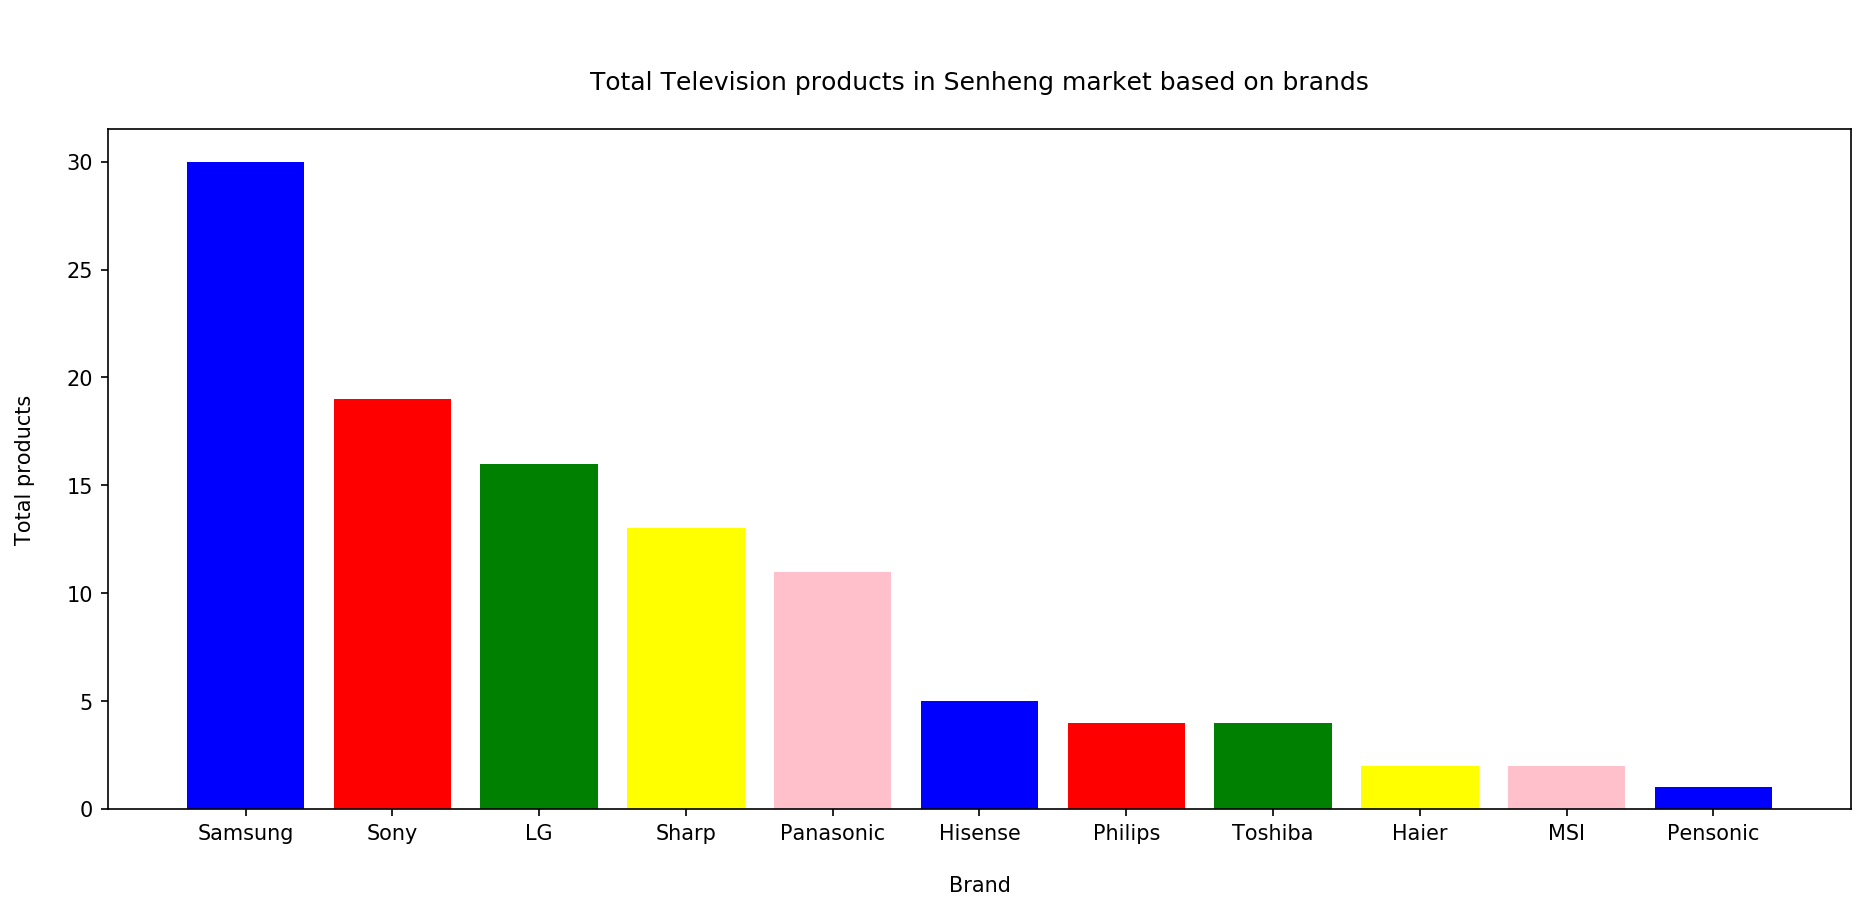

In [38]:
import matplotlib.pyplot as plt

x = np.arange(len(df_num_by_brands))
y = df_num_by_brands['count'].values
label = df_num_by_brands['product_name'].values
colors = ['blue','red','green','yellow','pink']

plt.figure(dpi=150, figsize=(15,6))
plt.bar(x, y, color=colors)
plt.title('\n\nTotal Television products in Senheng market based on brands\n')
plt.xticks(x,label)
plt.xlabel('\nBrand')
plt.ylabel('Total products\n')

plt.show()

<br>
#### Total number comparison for five different screen types and the visualization using barchart

In [26]:
df_type_count = df1.groupby('screen_type').count()[['product_name']].sort_values(by=['product_name'], ascending=False).reset_index()
df_type_count = df_type_count.rename(columns={'product_name': 'count'})

df_type_count

,screen_type,count
0,UHD,66
1,ULED,30
2,QLED,6
3,OLED,5


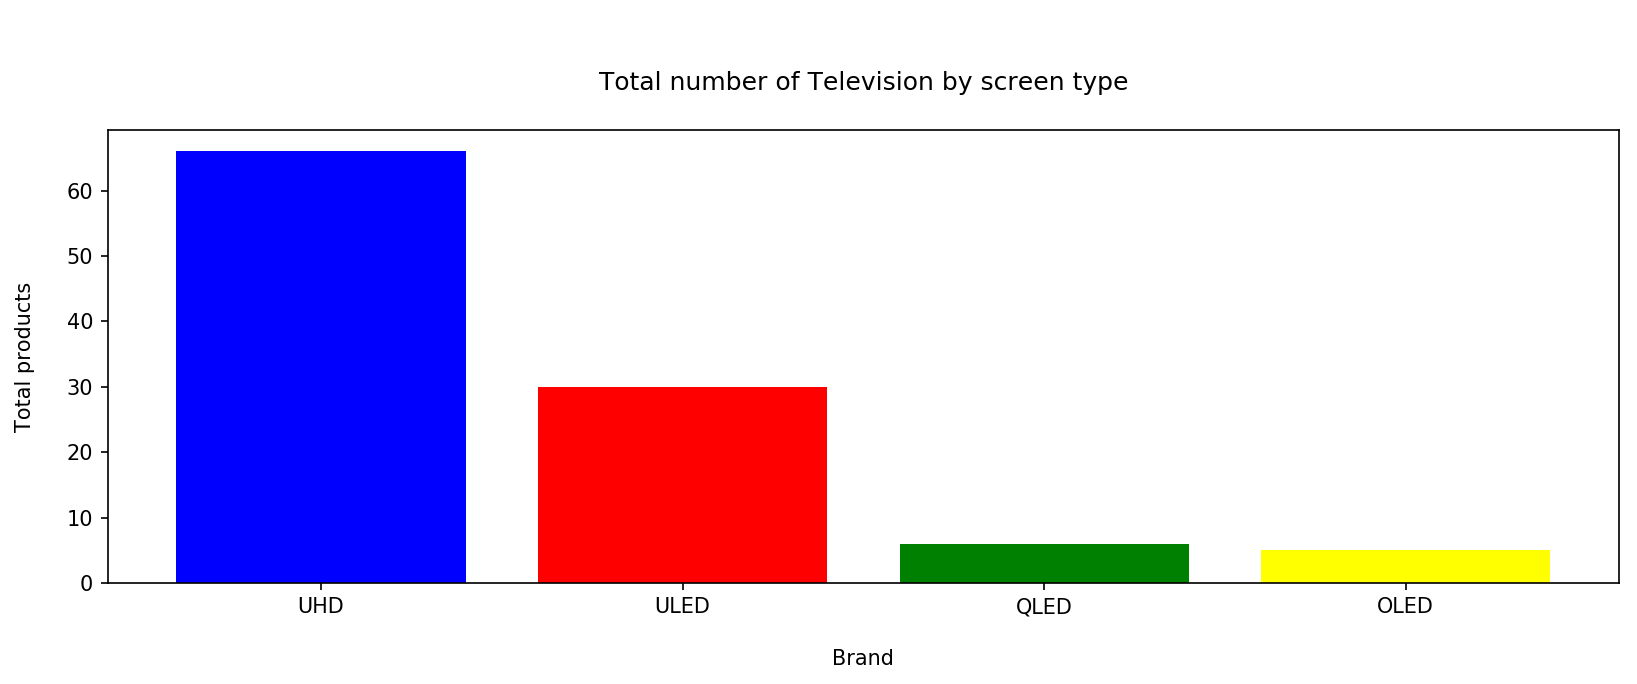

In [27]:
x = np.arange(len(df_type_count))
y = df_type_count['count'].values
label = df_type_count['screen_type'].values
colors = ['blue','red','green','yellow','pink']

plt.figure(dpi=150, figsize=(13,4))
plt.bar(x, y, color=colors)
plt.title('\n\nTotal number of Television by screen type\n')
plt.xticks(x,label)
plt.xlabel('\nBrand')
plt.ylabel('Total products\n')

plt.show()

<br>
#### Select and filter data which used Ultra HD screen type

In [28]:
df_uhd = df1[df1['screen_type'] == 'UHD'].sort_values(by=['product_name']).reset_index(drop=True)

df_uhd.head(20)

,product_name,regular_price,special_price,screen_type,screen_size,availability
0,Haier,889.0,749.0,UHD,32,In stock
1,Hisense,1899.0,1799.0,UHD,49,In stock
2,Hisense,1829.0,1499.0,UHD,49,In stock
3,LG,9433.0,5999.0,UHD,65,In stock
4,LG,15999.0,11999.0,UHD,75,In stock
5,LG,3961.0,2688.0,UHD,55,In stock
6,LG,3017.0,1999.0,UHD,49,In stock
7,LG,6131.0,3988.0,UHD,65,In stock
8,LG,3300.0,2599.0,UHD,50,In stock
9,LG,9999.0,5999.0,UHD,70,In stock


<br>
#### Find the average value of both regular and special price for Ultra HD products respective to brand type

In [29]:
df_uhd_mean = df_uhd.groupby('product_name').mean()[['regular_price','special_price']].reset_index()

df_uhd_mean = df_uhd_mean.rename(columns={'regular_price':'mean_regular_price', 'special_price':'mean_special_price'})

df_uhd_mean

,product_name,mean_regular_price,mean_special_price
0,Haier,889.000000,749.000000
1,Hisense,1864.000000,1649.000000
2,LG,6963.363636,4797.000000
3,MSI,1240.000000,1240.000000
4,Panasonic,1813.750000,1493.000000
5,Pensonic,442.000000,442.000000
6,Philips,799.000000,699.000000
7,Samsung,3875.857143,3102.285714
8,Sharp,2654.181818,1942.090909
9,Sony,4311.125000,3870.250000


<br>
#### Plot comparison between average regular price and average special price for each brands based on Ultra HD products

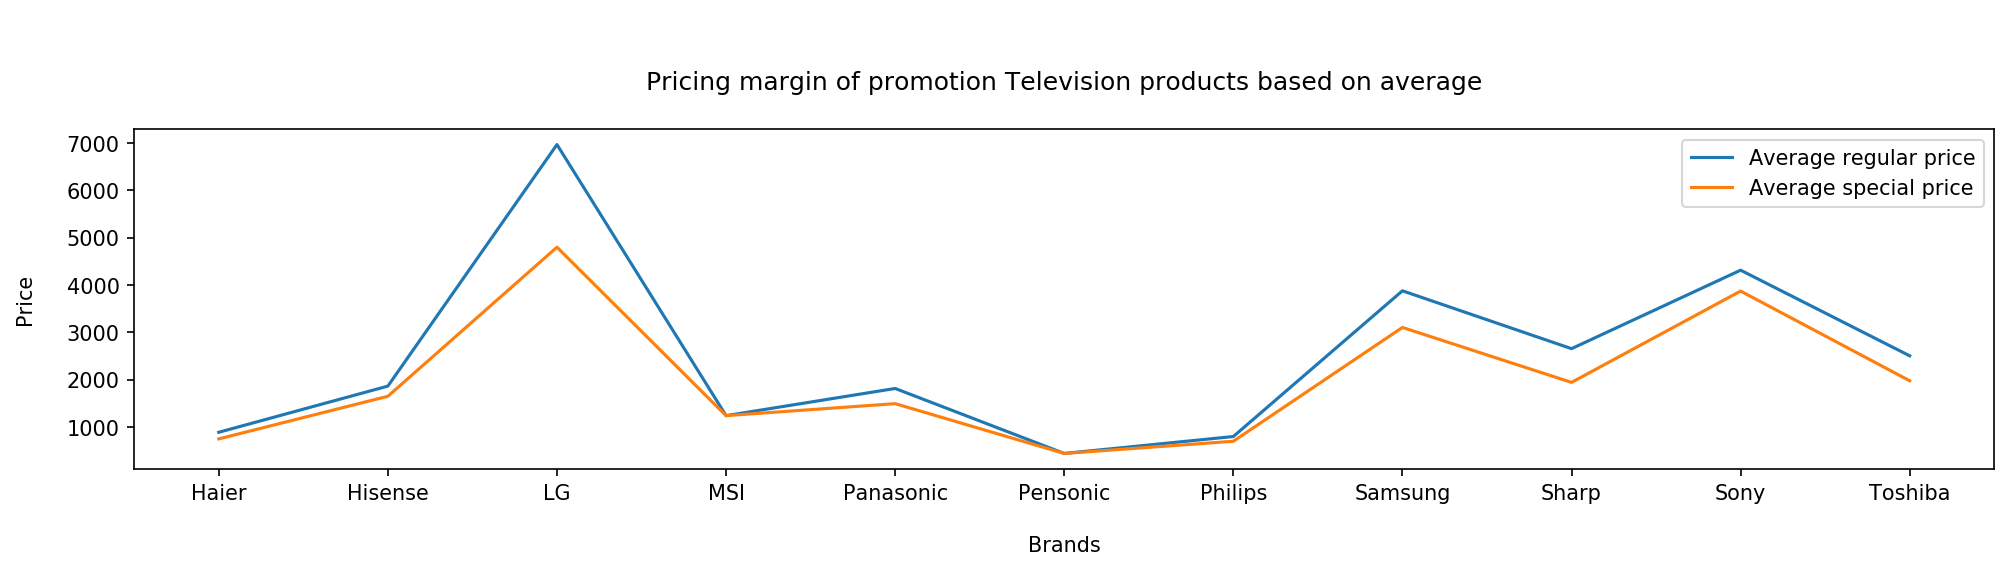

In [30]:
plt.figure(dpi=150, figsize=(16,3))


x = np.arange(len(df_uhd_mean))

plt.title("\n\nPricing margin of promotion Television products based on average\n") 
plt.plot(df_uhd_mean['mean_regular_price'], label='Average regular price') 
plt.plot(df_uhd_mean['mean_special_price'], label='Average special price')
plt.ylabel('Price\n')
plt.xlabel('\nBrands')
plt.xticks(x, df_uhd_mean['product_name'].values)

plt.legend()
plt.show() 

<br>
#### Select and filter data which used Ultra LED screen type

In [31]:
df_uled = df1[df1['screen_type'] == 'ULED'].sort_values(by=['product_name']).reset_index(drop=True)
df_uled

,product_name,regular_price,special_price,screen_type,screen_size,availability
0,Haier,2829.0,1885.0,ULED,50,In stock
1,Hisense,2699.0,2399.0,ULED,55,In stock
2,Hisense,2999.0,2699.0,ULED,55,In stock
3,Hisense,4999.0,4299.0,ULED,65,In stock
4,LG,12999.0,7999.0,ULED,75,In stock
5,LG,22999.0,17999.0,ULED,86,Out of stock
6,Panasonic,15093.0,12888.0,ULED,75,In stock
7,Panasonic,11879.0,9599.0,ULED,55,In stock
8,Panasonic,4479.0,3199.0,ULED,55,In stock
9,Panasonic,6725.0,4899.0,ULED,65,In stock


<br>
#### Total number of Ultra LED product by brand and the visualization using barchart

In [32]:
df_uled_count = df_uled.groupby('product_name').count()[['regular_price']].sort_values(by=['regular_price'], ascending=False).reset_index()

df_uled_count = df_uled_count.rename(columns={'regular_price': 'count'})

df_uled_count

,product_name,count
0,Sony,9
1,Panasonic,7
2,Hisense,3
3,Philips,3
4,Samsung,3
5,LG,2
6,Sharp,2
7,Haier,1


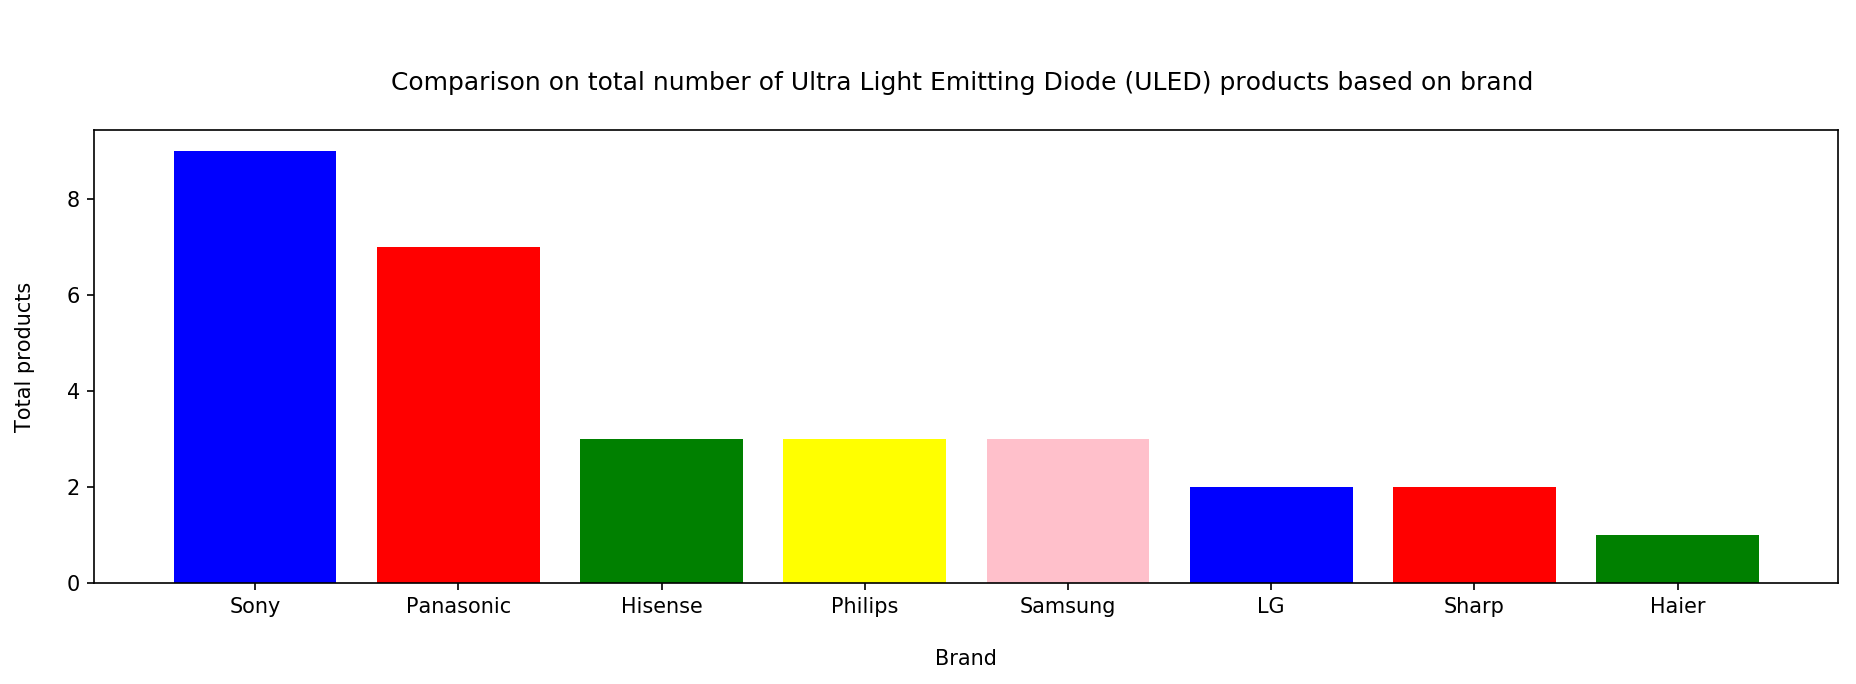

In [33]:
x = np.arange(len(df_uled_count))
y = df_uled_count['count'].values
label = df_uled_count['product_name'].values
colors = ['blue','red','green','yellow','pink']

plt.figure(dpi=150, figsize=(15,4))
plt.bar(x, y, color=colors)
plt.title('\n\nComparison on total number of Ultra Light Emitting Diode (ULED) products based on brand \n')
plt.xticks(x,label)
plt.xlabel('\nBrand')
plt.ylabel('Total products\n')

plt.show()

<br>
#### Select and filter data which from Samsung brand and find the total product from different screen type

In [34]:
df_samsung = df1[df1['product_name'] == 'Samsung'].reset_index(drop=True).sort_values(by=['screen_type'])

In [35]:
df_samsung.groupby('screen_type').count()[['regular_price']].reset_index().rename(columns = {'regular_price':'count'})

,screen_type,count
0,QLED,6
1,UHD,21
2,ULED,3


<br>
#### Determine total number of Samsung product that have out of stock

In [36]:
df_samsung.groupby('availability').count()[['regular_price']].reset_index().rename(columns = {'regular_price':'count'})

,availability,count
0,In stock,22
1,Out of stock,8


In [37]:
df1[df1['availability'] == 'Out of stock']

,product_name,regular_price,special_price,screen_type,screen_size,availability
11,Sony,2168.0,1699.0,UHD,48,Out of stock
36,Samsung,8489.0,6969.0,QLED,55,Out of stock
42,Sony,20999.0,19599.0,UHD,85,Out of stock
89,LG,22999.0,17999.0,ULED,86,Out of stock
94,Samsung,6131.0,4999.0,ULED,49,Out of stock
95,Samsung,848.0,510.0,UHD,24,Out of stock
96,Samsung,593.0,460.0,UHD,24,Out of stock
97,Samsung,1225.0,700.0,UHD,27,Out of stock
98,Samsung,1414.0,975.0,UHD,27,Out of stock
99,Samsung,1792.0,1250.0,ULED,28,Out of stock
